# Horizon2D Class - ODBind Python Bindings

In [1]:
import os
import sys

**If this notebook is not opened from OpendTect then the following paths should be set for your system and the cell executed.**

In [2]:
odpy_path = '/home/wayne/Work/WMSeismicSolutions/dGB/Development/Build/bin/od7.0/bin/python'
data_root = '/mnt/Data/seismic/ODData'
sys.path.insert(0,odpy_path)
os.environ["DTECT_DATA"] = data_root

In [3]:
import numpy as np
import odbind as odb

## Horizon2D class

The Horizon2D class provides access to 2D horizons in an OpendTect project/survey. A Survey object is required for context.

The user must create an **Horizon2D** object to access a specific 2D horizon. There are 2 constructors provided:
-   **Horizon2D( survey:odSurvey, horizon_name:str )** which opens an existing horizon called "horizon_name" if it exists or raises an exception.
-   **Horizon2D.create( survey:odSurvey, horizon_name:str, creategeom:bool, overwrite:bool )** which creates a new 2D horizon called "horizon_name". By default "overwrite" is set to false so if "horizon_name" already exists the statement will fail but if true any existing 2D horizon of the same name will be replaced.

In [4]:
f3demo = odb.Survey(data_root, 'F3_Demo_2020')

### Horizon2D.info() function
Returns basic information for a 2D horizon in a Python dictionary

In [5]:
gbase = odb.Horizon2D(f3demo, 'SSIS-Grid-Base')
gbase.info()

{'name': 'SSIS-Grid-Base',
 'z_range': [0.535874783992767, 1.091473340988159],
 'line_count': 10,
 'attrib_count': 0}

### Horizon2D.attribnames property
Return a list of the attributes attached to this horizon.

In [6]:
gbase.attribnames

[]

### Horizon2D.lineids() function
Returns a list of the integer lineid's for lines with data for this horizon

In [7]:
gbase.lineids()

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

### Horizon2D.linenames() function
Return a list of line names with data for this horizon

In [8]:
gbase.linenames()

['SSIS-Grid-Dip1',
 'SSIS-Grid-Dip2',
 'SSIS-Grid-Dip3',
 'SSIS-Grid-Dip4',
 'SSIS-Grid-Strike1',
 'SSIS-Grid-Strike2',
 'SSIS-Grid-Strike3',
 'SSIS-Grid-Strike4',
 'SSIS-Grid-Strike5',
 'SSIS-Grid-Strike6']

### Horizon2D.linename(lineid) function
Return the line name for the given lineid

In [9]:
gbase.linename(3)

'SSIS-Grid-Dip1'

### Horizon2D.getz(lineid), Horizon2D.getxy(lineid) and Horizon2D.get_xarray(lineid) functions

-  getz(): return a Numpy 1D array with the horizon Z values for the given lineid
-  getxy(): return a tuple of Numpy 1D arrays with the X coordinates, Y coordinates and trace numbers of the horizon z values for the given lineid
-  get_xarray(): return an XArray DataArray with the horizon X, Y, trace numbers and Z values for the given lineid

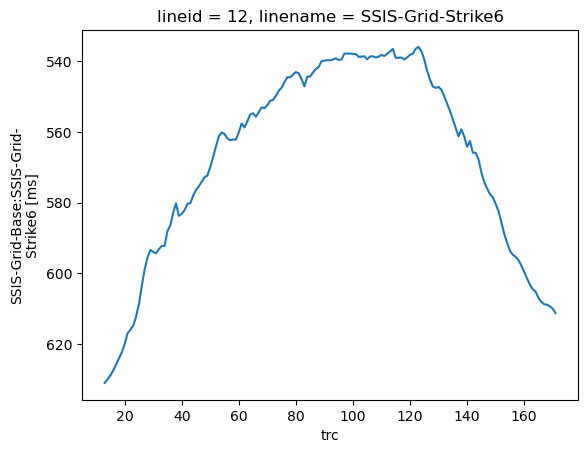

In [10]:
import xarray as xr
hor = gbase.get_xarray(12)
hor.plot(yincrease=False)

### Horizon2D.feature() function
Returns a GeoJSON feature collection with the outline of the 2D horizon. This can be used in map displays.

In [11]:
gbase.feature()

'{"type":"FeatureCollection","features":[{"type":"Feature","properties":{"name":"SSIS-Grid-Base","z_range":[0.535874783992767,1.091473340988159],"line_count":10,"attrib_count":0},"geometry":{"type":"MultiLineString","coordinates":[[["4.580122","54.880604"],["4.829624","54.927198"]],[["4.829476","54.974369"],["4.462301","54.905695"]],[["4.829331","55.021536"],["4.461725","54.952865"]],[["4.534664","55.013832"],["4.461147","55.000038"]],[["4.482080","54.880294"],["4.462130","54.915217"]],[["4.563898","54.880591"],["4.488573","55.013276"]],[["4.645715","54.880826"],["4.570661","55.013560"]],[["4.727531","54.881006"],["4.646343","55.025124"]],[["4.809346","54.881137"],["4.728454","55.025301"]],[["4.829484","54.991590"],["4.810563","55.025426"]]]}}]}'

In [15]:
import folium
survmap = folium.Map(location=[52.3,8.0], tiles="Stamen Terrain", zoom_start = 6, min_lat=-90, max_lat=90, min_lon=-180, max_lon=180, max_bounds=True, maxBoundsViscosity=1)
folium.GeoJson(gbase.feature(), popup=folium.GeoJsonPopup(fields=['name'])).add_to(survmap)
survmap

## Static methods
A number of methods are provided to get information either for all or a selected number of 2D horizons in the user provided survey.

In [12]:
hors = odb.Horizon2D.names(f3demo)
hors

['SSIS-Grid-Base',
 'SSIS-Grid-Top',
 'SSIS-Grid1-MFS1',
 'SSIS-Grid3-SB1',
 'SSIS-Grid7-MRS2',
 'SSIS-Grid6-SB2',
 'SSIS-Grid4-MRS1',
 'SSIS-Grid2-TopHST1',
 'SSIS-Grid5-TopHST2',
 '2D Demo0 - FS4',
 '2D Demo1 - MFS4',
 '2D Demo4 - Truncation',
 '2D Demo6 - FS8',
 '2D Demo7 - FS11']

### Horizon2D.infos() and Horizon2D.infos_dataframe() functions
These return a dictionary and a Pandas DataFrame respectively with basic information for the listed horizons (or all horizons if no list provided) in the given survey.

In [13]:
odb.Horizon2D.infos_dataframe(f3demo)

,name,z_range,line_count,attrib_count
0,SSIS-Grid-Base,"[0.535874783992767, 1.091473340988159]",10,0
1,SSIS-Grid-Top,"[0.427393287420273, 0.832983076572418]",10,0
2,SSIS-Grid1-MFS1,"[0.717825710773468, 1.039108514785767]",1,0
3,SSIS-Grid3-SB1,"[0.492197394371033, 1.0893862247467]",4,0
4,SSIS-Grid7-MRS2,"[0.4436174929142, 0.989517986774445]",10,0
5,SSIS-Grid6-SB2,"[0.44481930136681, 1.04135]",10,0
6,SSIS-Grid4-MRS1,"[0.49088379740715, 1.06265664100647]",4,0
7,SSIS-Grid2-TopHST1,"[0.629609823226929, 1.090385913848877]",2,0
8,SSIS-Grid5-TopHST2,"[0.487022310495377, 1.037940859794617]",7,0
9,2D Demo0 - FS4,"[0.738831281661987, 1.118974924087524]",1,0


### Horizon2D.features() function
Returns a GeoJSON feature collection for the listed 2D horizons (or all 2D horizons if no list provided) in the given survey. This can be used to create map displays.

In [14]:
odb.Horizon2D.features(f3demo, hors[3:5])

'{"type":"FeatureCollection","features":[{"type":"Feature","properties":{"name":"SSIS-Grid3-SB1","z_range":[0.492197394371033,1.0893862247467],"line_count":4,"attrib_count":0},"geometry":{"type":"MultiLineString","coordinates":[[["4.580122","54.880604"],["4.829624","54.927198"]],[["4.829476","54.974369"],["4.462301","54.905695"]],[["4.829331","55.021536"],["4.461725","54.952865"]],[["4.727531","54.881006"],["4.646343","55.025124"]]]}},{"type":"Feature","properties":{"name":"SSIS-Grid7-MRS2","z_range":[0.4436174929142,0.989517986774445],"line_count":10,"attrib_count":0},"geometry":{"type":"MultiLineString","coordinates":[[["4.580122","54.880604"],["4.829624","54.927198"]],[["4.829476","54.974369"],["4.462301","54.905695"]],[["4.829331","55.021536"],["4.461725","54.952865"]],[["4.534664","55.013832"],["4.461147","55.000038"]],[["4.482080","54.880294"],["4.462130","54.915217"]],[["4.563898","54.880591"],["4.488573","55.013276"]],[["4.645715","54.880826"],["4.570661","55.013560"]],[["4.727